In [ ]:
import pandas as pd
from googletrans import Translator

# cargar el archivo con el dataframe y seleccionar la columna de tweets
df = pd.read_json('tweets.json')
tweets = df['texto']

# crear una instancia del traductor y definir idiomas origen y destino
translator = Translator(service_urls=['translate.google.com'])
dest_lang = 'en'

# función para traducir un tweet
def translate_tweet(tweet):
    #try:
        return translator.translate(tweet, dest=dest_lang).text
    #except:
    #    return Exception

# aplicar la función a cada tweet en la columna y reemplazar el texto original
df['texto'] = tweets.apply(translate_tweet)

# guardar el dataframe con los tweets traducidos en inglés en un nuevo archivo
df.to_csv('googletranslate.csv', index=False)

In [3]:
import pandas as pd
df = pd.read_csv('googletranslate.csv')

In [4]:
print(df.columns)

Index(['id', 'texto', 'usuario', 'hashtags', 'fecha', 'retweets', 'favoritos'], dtype='object')


In [5]:
from textblob import TextBlob
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive' 


In [6]:
#Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
df['TextBlob_Polarity'] =df['texto'].apply(getPolarity)
df['TextBlob_Analysis'] = df['TextBlob_Polarity'].apply(getAnalysis )

In [6]:
print(df.columns)

Index(['id', 'texto', 'usuario', 'hashtags', 'fecha', 'retweets', 'favoritos',
       'TextBlob_Polarity', 'TextBlob_Analysis'],
      dtype='object')


In [7]:
temp = df.groupby('TextBlob_Analysis').count()['texto'].reset_index().sort_values(by='texto',ascending=False)
temp.style.background_gradient(cmap='Purples')

,TextBlob_Analysis,texto
2,Positive,18
1,Neutral,4
0,Negative,3


<Axes: xlabel='TextBlob_Analysis', ylabel='count'>

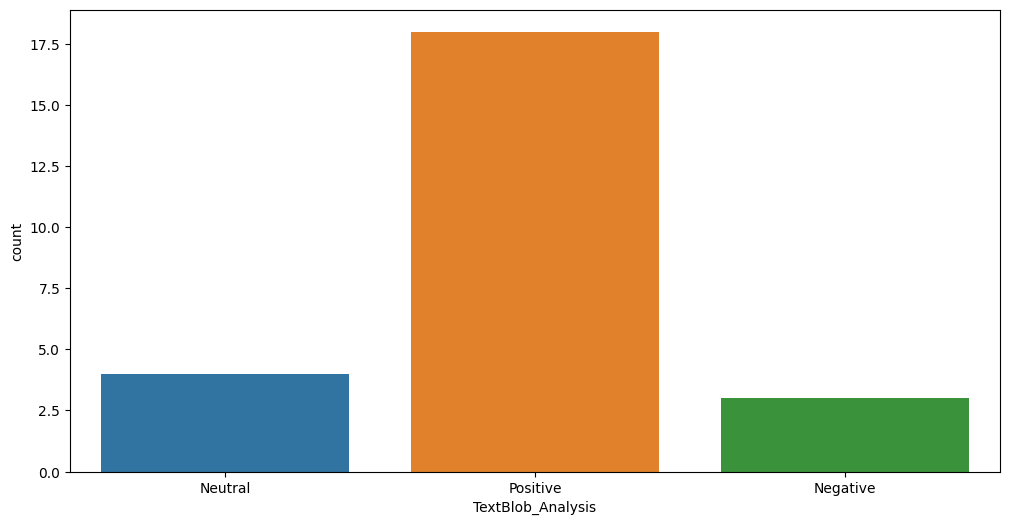

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='TextBlob_Analysis',data=df)

In [9]:
from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text =temp.TextBlob_Analysis,
    values = temp.texto,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [14]:
from collections import Counter
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
df['temp_list'] = df['temp_list'].apply(lambda x:remove_stopword(x))
df['temp_list'] = df['Tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

NameError: name 'stopwords' is not defined

In [11]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [12]:
import nltk
from nltk.corpus import stopwords
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
df['temp_list'] = df['temp_list'].apply(lambda x:remove_stopword(x))

In [13]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,new,11
2,last,11
3,article,9
4,know,8
5,everything,8
6,need,7
7,way,6
8,explain,5
9,Apple,4
10,announces,4


In [14]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [6]:
Positive_sent = df[df['TextBlob_Analysis']=='Positive']
Negative_sent = df[df['TextBlob_Analysis']=='Negative']
Neutral_sent = df[df['TextBlob_Analysis']=='Neutral']

In [16]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,new,10
1,technology,10
2,last,6
3,article,5
4,Apple,4
5,announces,4
6,The,4
7,used,4
8,launch,3
9,iPhone,3


In [17]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [20]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,Artificial,2
2,know,2
3,last,2
4,article,2
5,everything,2
6,#ia,2
7,Google,1
8,presents,1
9,new,1
10,virtual,1


In [21]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [22]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Blues')

,Common_words,count
1,way,4
2,Virtual,3
3,everything,3
4,need,3
5,know,3
6,last,3
7,reality,2
8,revolutionizing,2
9,experience,2
10,article,2


In [23]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [24]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

In [27]:
df['temp_list1'] = df['texto'].apply(lambda x:str(x).split()) #List of words in every row for text
df['temp_list1'] = df['temp_list1'].apply(lambda x:remove_stopword(x)) #Removing Stopwords
raw_text = [word for word_list in df['temp_list1'] for word in word_list]

In [40]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in df[df.TextBlob_Analysis != sentiment]['temp_list1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in df[df.TextBlob_Analysis == sentiment]['temp_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [41]:
Unique_Positive= words_unique('Positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,Apple,4
1,announces,4
2,The,4
3,used,4
4,launch,3
5,iPhone,3
6,#Technology,3
7,many,3
8,company,2
9,flight,2


In [42]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

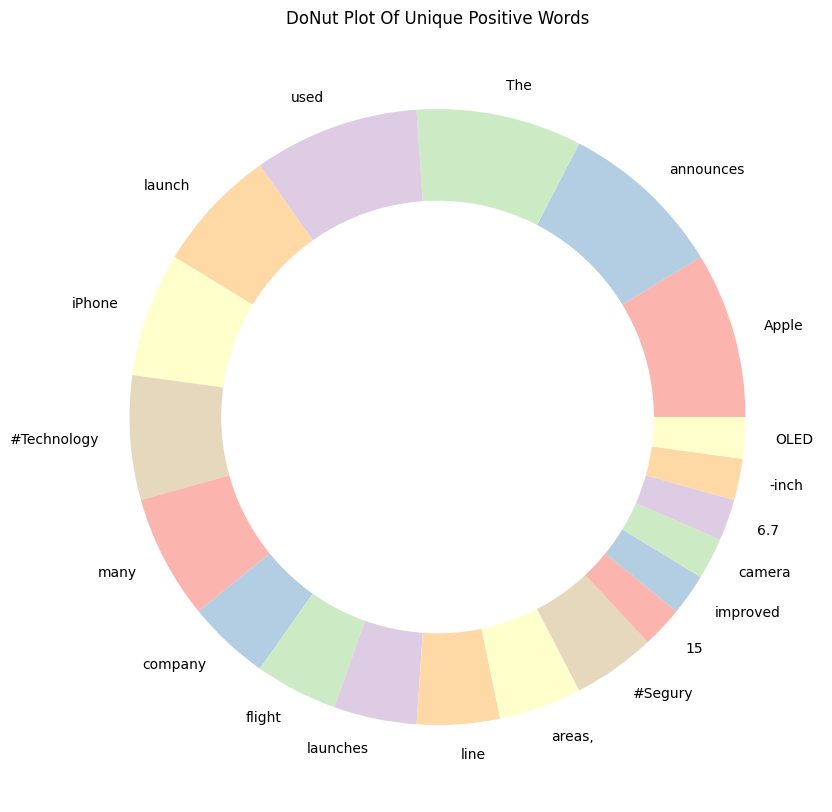

In [44]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

In [48]:
Unique_Negative= words_unique('Negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,intelligence,3
1,Artificial,2
2,#ia,2
3,assistant,1
4,artificial,1
5,allows,1
6,control,1
7,home,1
8,smartphone.#Google,1
9,#Hogarinteligente,1


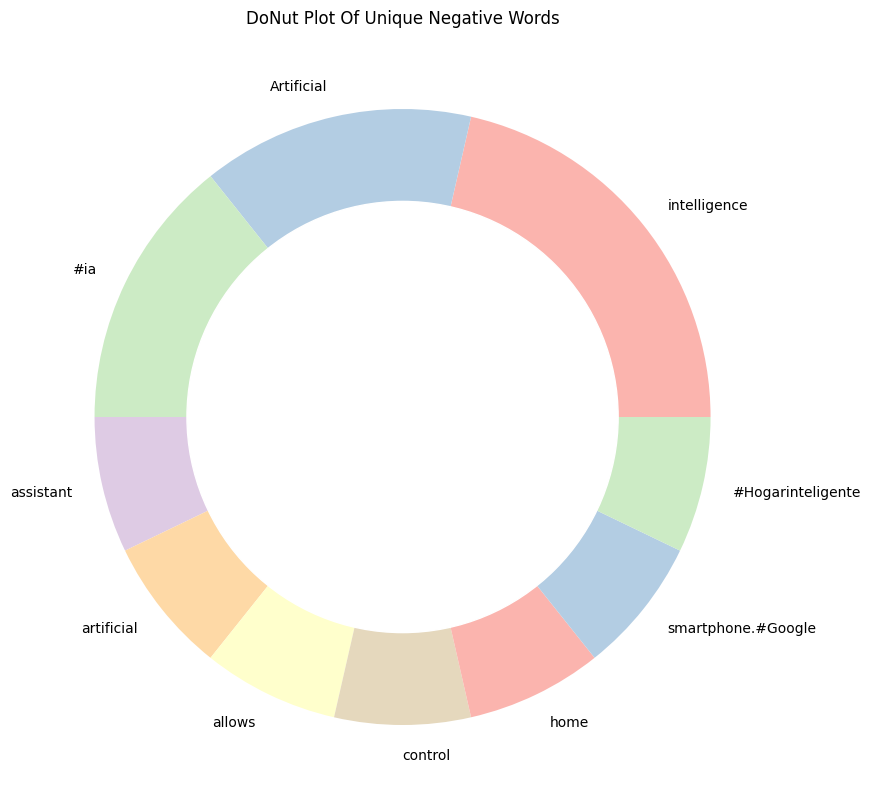

In [49]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

In [50]:
Unique_Neutral= words_unique('Neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


,words,count
0,Virtual,3
1,experience,2
2,games.##Videojuegos,1
3,Blockchain,1
4,financial,1
5,transactions,1
6,made.Discover,1
7,article.#BLOCKCHAIN,1
8,#CRIPTOMONEDAS,1
9,Cloud,1


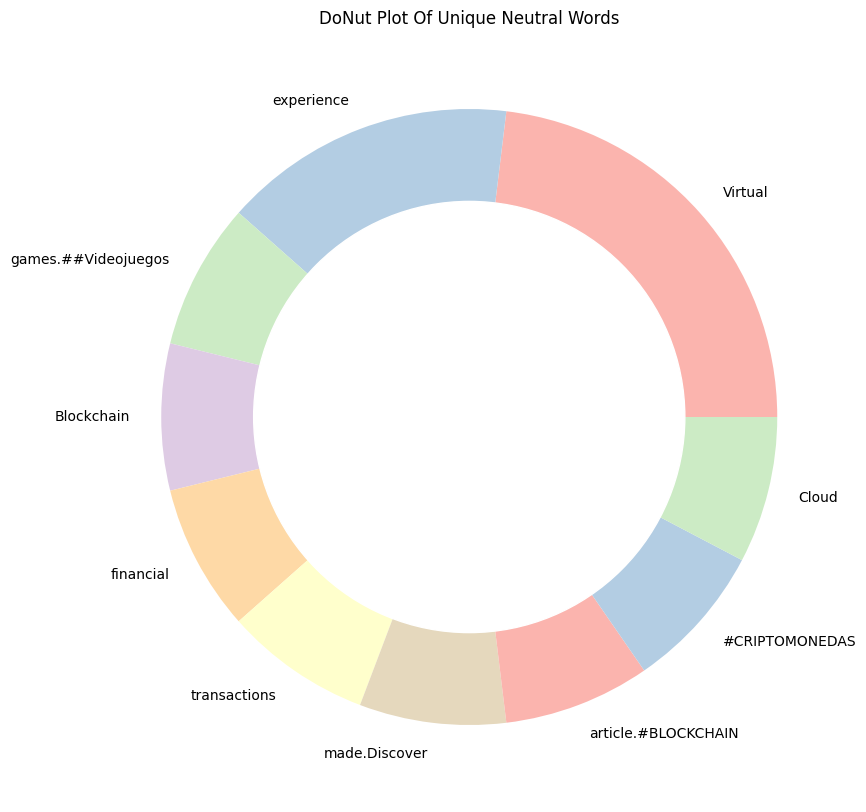

In [51]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.show()

In [60]:
df.to_csv('success.csv', index=False)

In [2]:
import pandas as pd
df=pd.read_csv('success.csv')

In [3]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [4]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

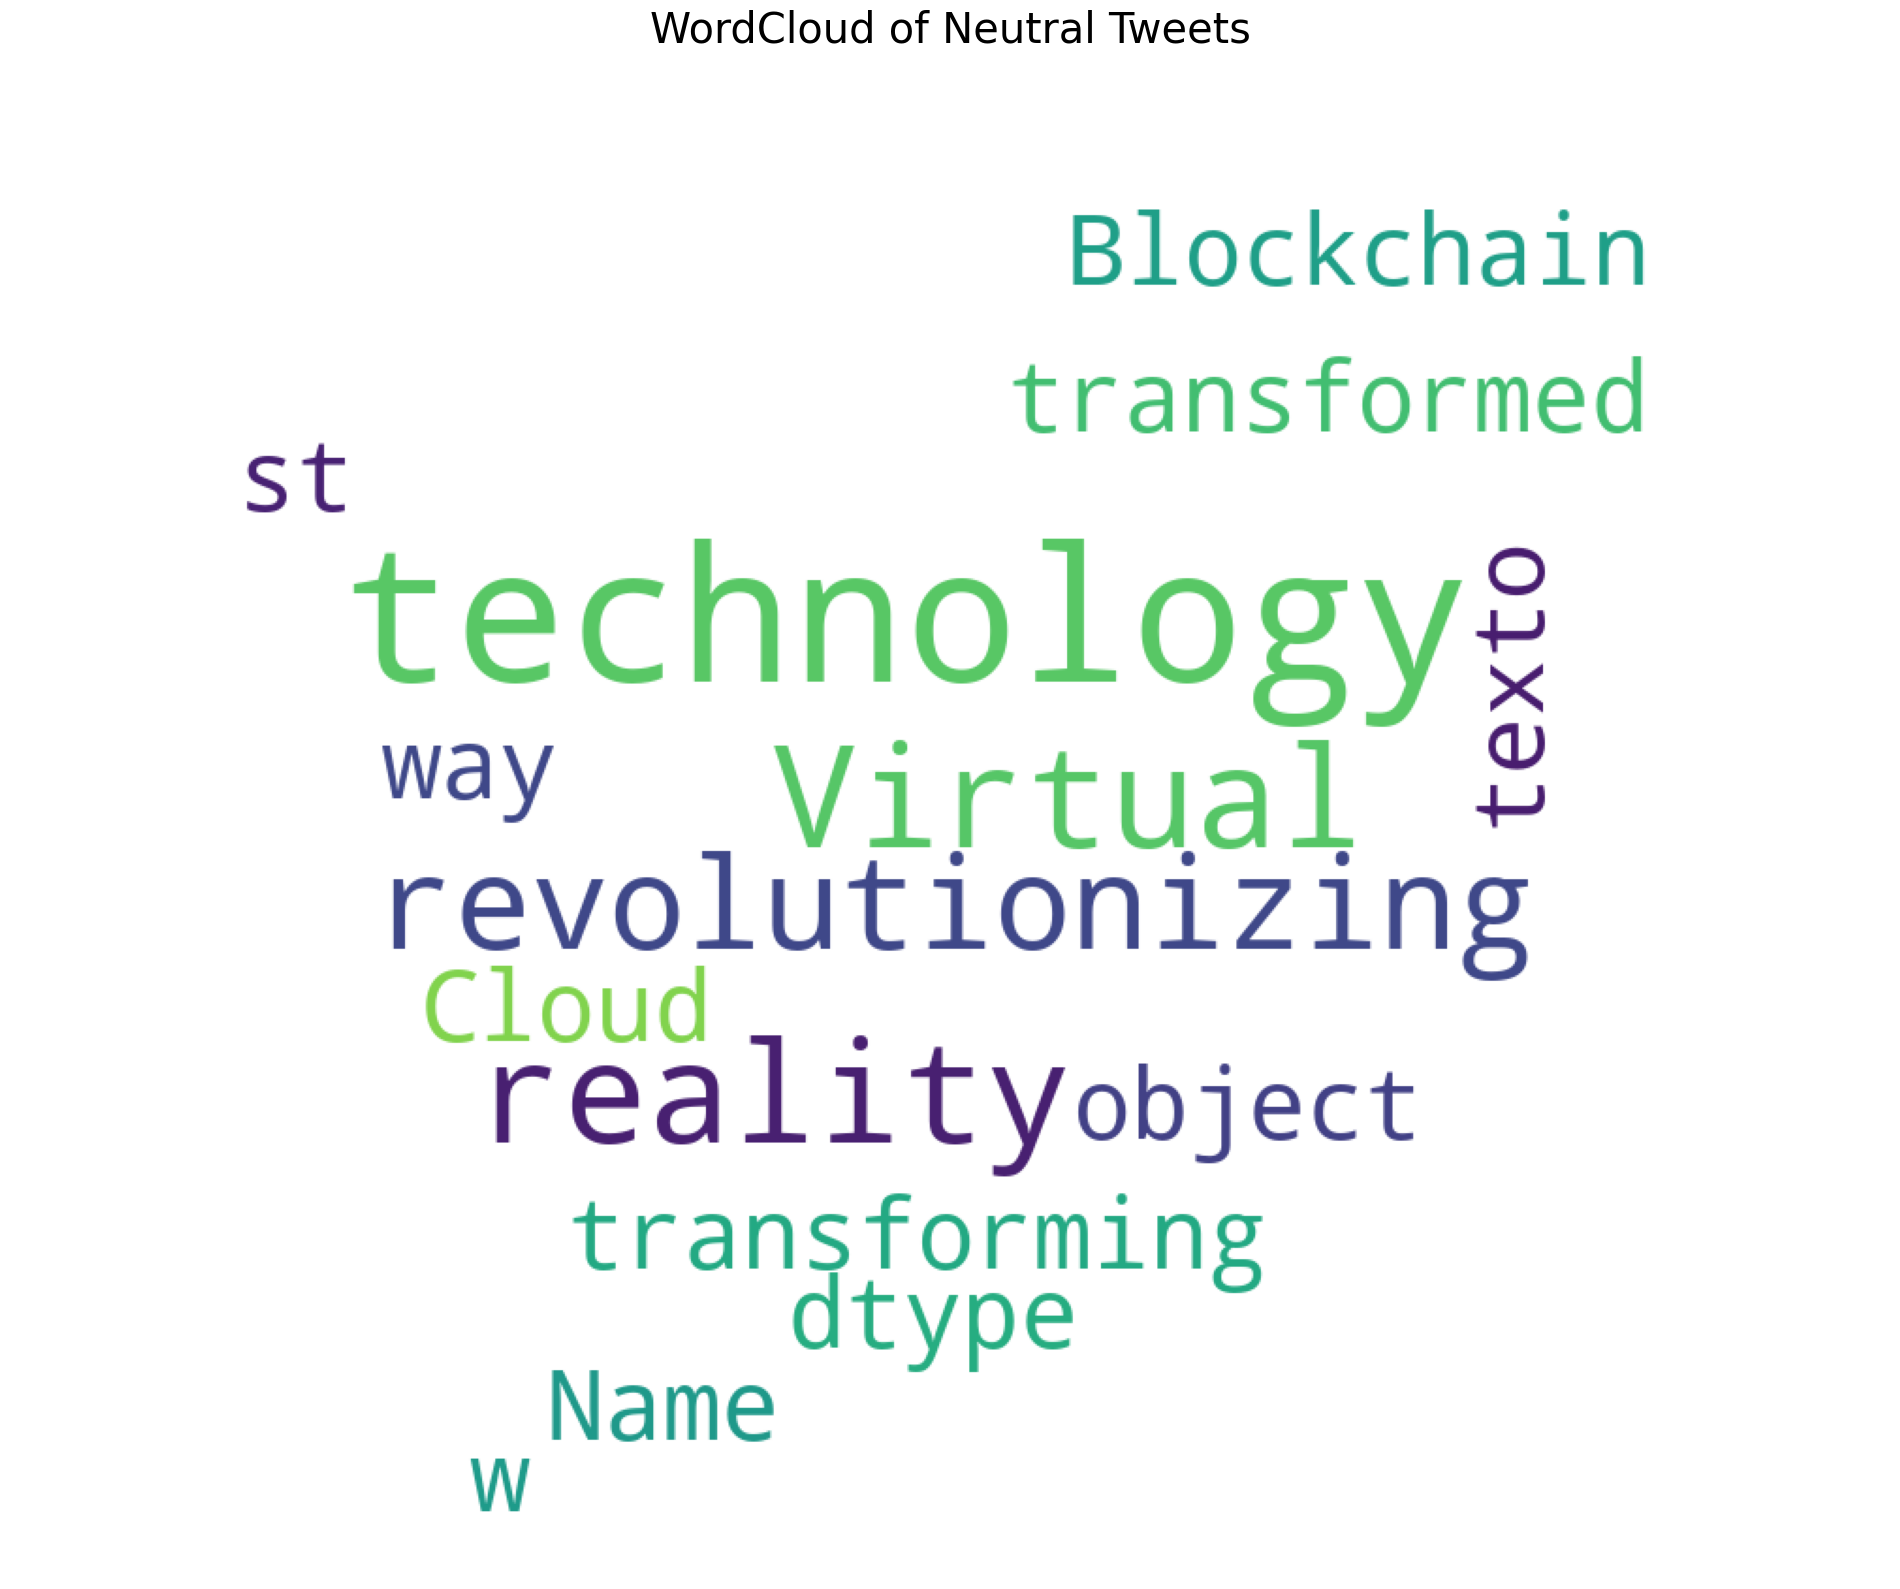

In [10]:
pos_mask = np.array(Image.open('twitter_mask.png'))
plot_wordcloud(Neutral_sent.texto,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Neutral Tweets")

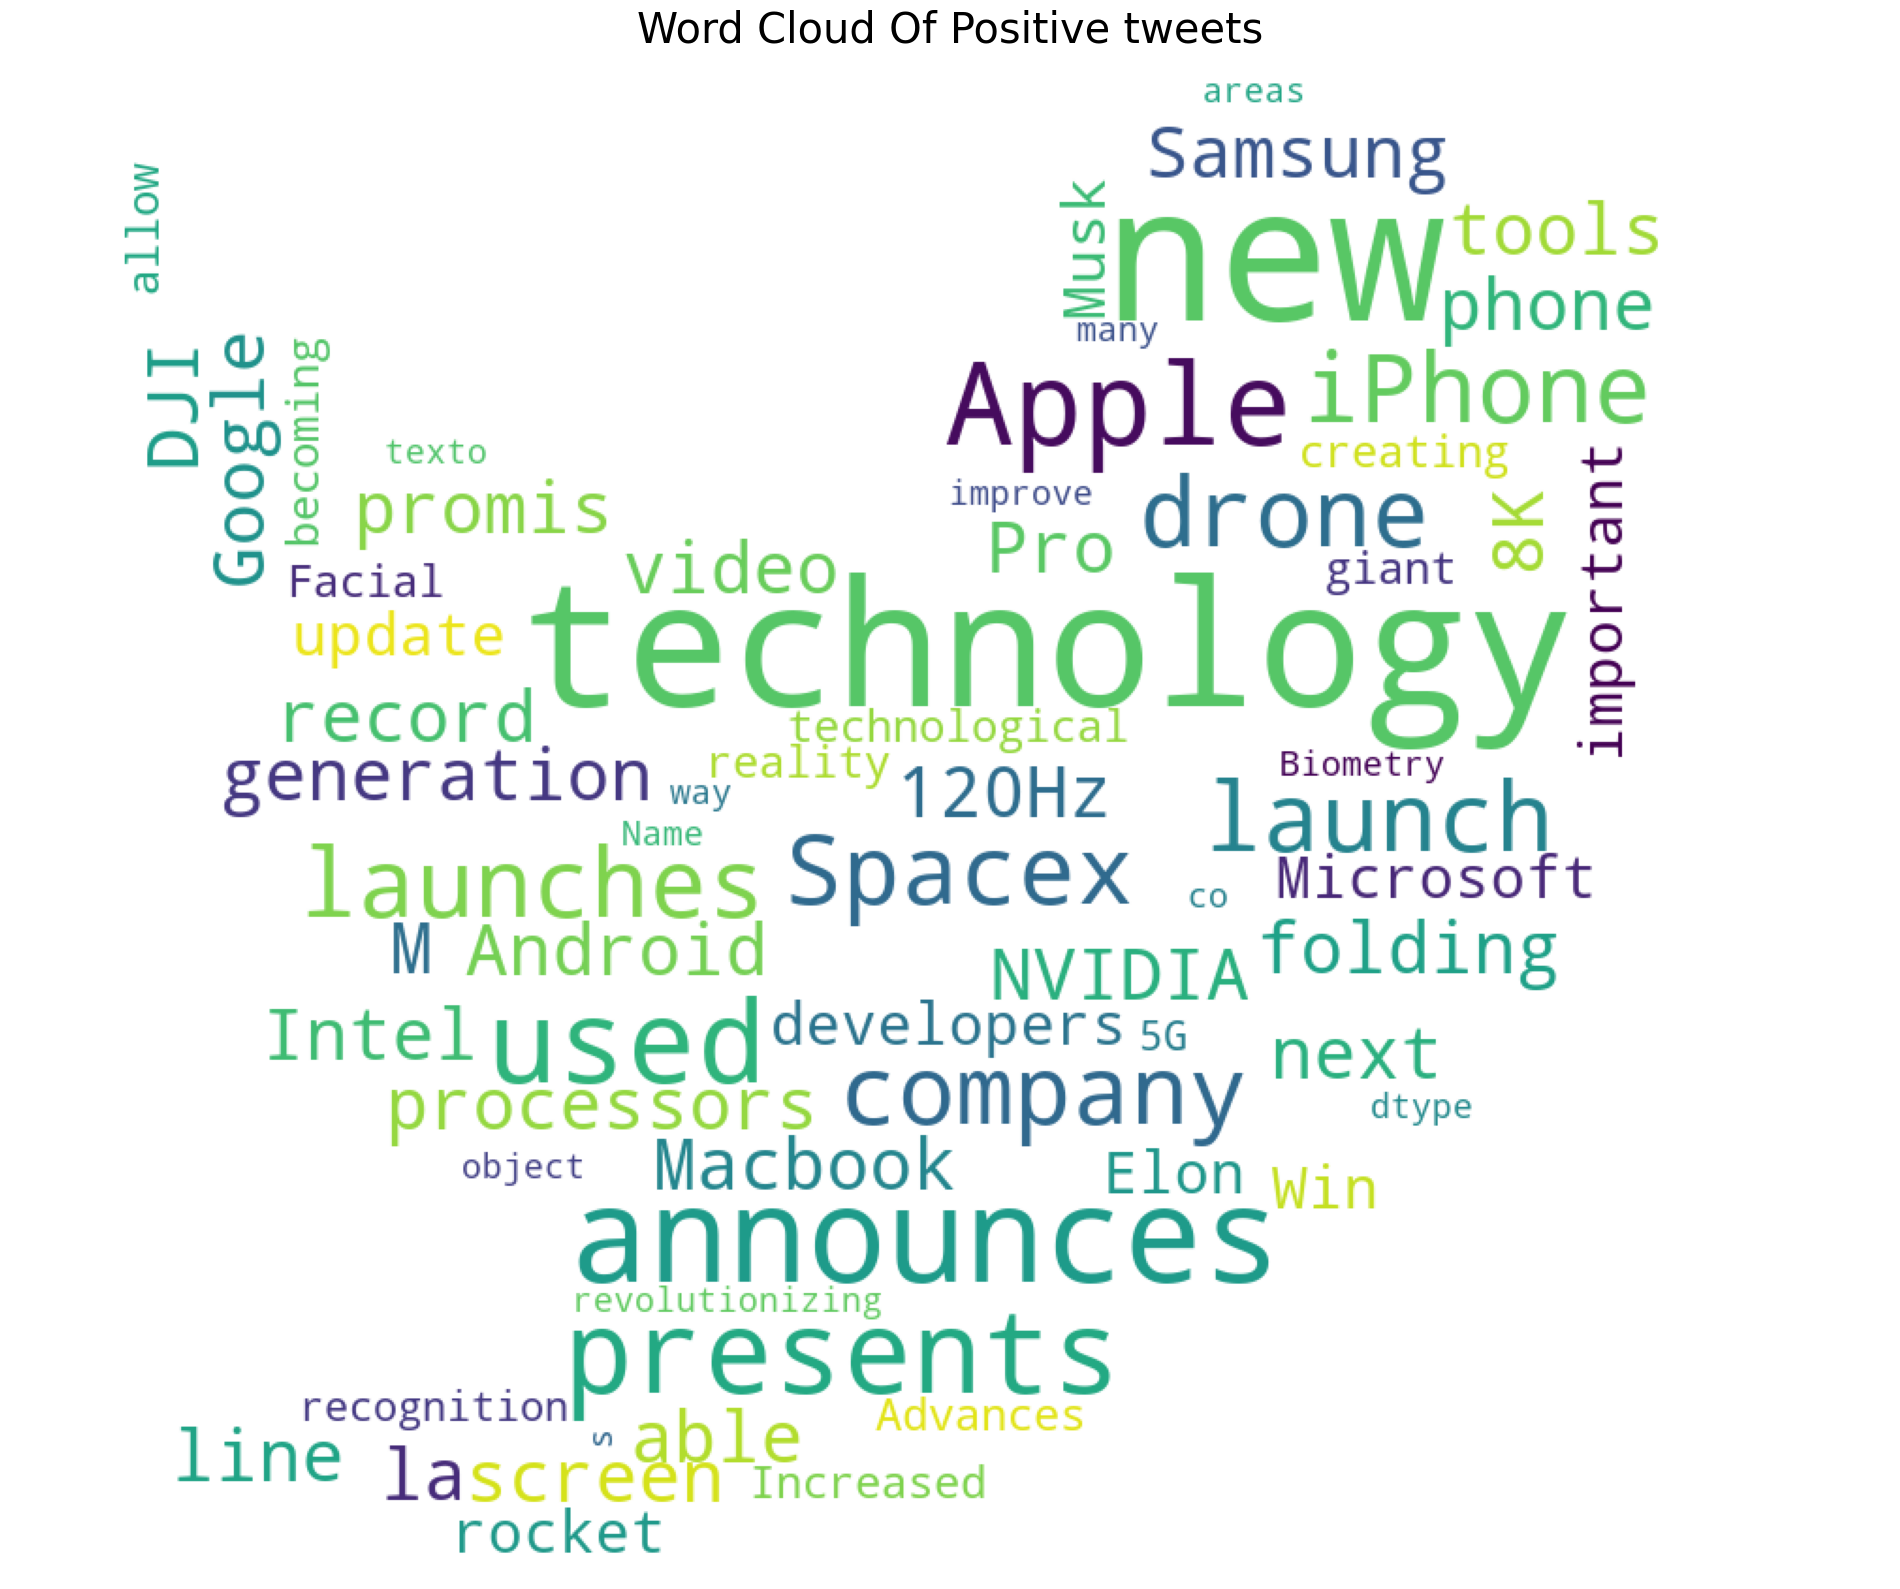

In [12]:
plot_wordcloud(Positive_sent.texto,mask=pos_mask,title="Word Cloud Of Positive tweets",title_size=30)
